In [1]:
import numpy as np

# Importing standard Qiskit libralies
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import SamplerV2
#from qiskit_ibm_provider import IBMProvider
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit.providers.fake_provider import GenericBackendV2, FakeQasmBackend
from qiskit_aer import StatevectorSimulator, AerSimulator
from qiskit import ClassicalRegister, QuantumRegister
# Import from Qiskit Aer noise module
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError, pauli_error, depolarizing_error, thermal_relaxation_error)

In [2]:
# オラクル
def oracle(circuit):
    circuit.x([0,2])
    circuit.mcx([0,1,2],3)

In [3]:
# 量子回路の初期化
circuit = QuantumCircuit(4,3)

In [4]:
# ステップ1 重ね合わせ状態を作成
circuit.x(3)
circuit.h([0,1,2,3])

In [5]:
for _ in range(2):
    # ステップ2 選択的回転
    oracle(circuit)

    # ステップ3 拡散変換
    circuit.h([0,1,2])
    circuit.x([0,1,2])
    circuit.h(2)
    circuit.ccx(0,1,2)
    circuit.h(2)
    circuit.h([0,1,2])
    circuit.x([0,1,2])

In [6]:
# 測定
circuit.measure([0,1,2],[0,1,2])
circuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=4, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(4, 'q'), 0), Qubit(QuantumRegister(4, 'q'), 1), Qubit(QuantumRegister(4, 'q'), 2), Qubit(QuantumRegister(4, 'q'), 3)), clbits=())

In [7]:
# 実行と結果の取得
simulator = AerSimulator()
result_ideal = simulator.run(circuit).result()
print(result_ideal.get_counts(circuit))

{'100': 6, '001': 3, '101': 195, '111': 12, '011': 217, '110': 181, '000': 4, '010': 406}


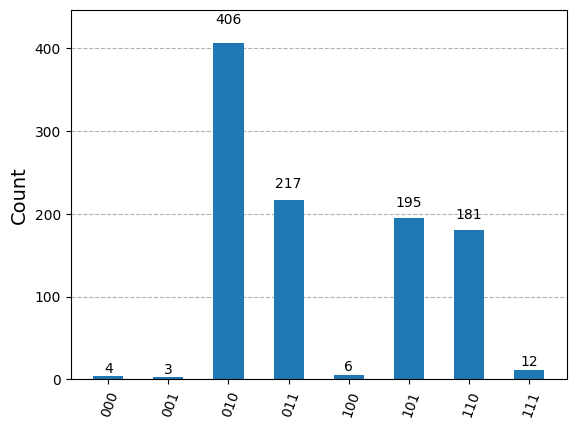

In [8]:
plot_histogram(result_ideal.get_counts(0))